# Image features exercise
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. For more details see the [assignments page](http://vision.stanford.edu/teaching/cs231n/assignments.html) on the course website.*

We have seen that we can achieve reasonable performance on an image classification task by training a linear classifier on the pixels of the input image. In this exercise we will show that we can improve our classification performance by training linear classifiers not on raw pixels but on features that are computed from the raw pixels.

All of your work for this exercise will be done in this notebook.

In [1]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Load data
Similar to previous exercises, we will load CIFAR-10 data from disk.

In [2]:
from cs231n.features import color_histogram_hsv, hog_feature

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
    
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]
    
    return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print(X_train.shape)

(49000, 32, 32, 3)


## Extract Features
For each image we will compute a Histogram of Oriented
Gradients (HOG) as well as a color histogram using the hue channel in HSV
color space. We form our final feature vector for each image by concatenating
the HOG and color histogram feature vectors.

Roughly speaking, HOG should capture the texture of the image while ignoring
color information, and the color histogram represents the color of the input
image while ignoring texture. As a result, we expect that using both together
ought to work better than using either alone. Verifying this assumption would
be a good thing to try for the bonus section.

The `hog_feature` and `color_histogram_hsv` functions both operate on a single
image and return a feature vector for that image. The extract_features
function takes a set of images and a list of feature functions and evaluates
each feature function on each image, storing the results in a matrix where
each column is the concatenation of all feature vectors for a single image.

In [3]:
from cs231n.features import *

num_color_bins = 10 # Number of bins in the color histogram
feature_fns = [hog_feature, lambda img: color_histogram_hsv(img, nbin=num_color_bins)]
X_train_feats = extract_features(X_train, feature_fns, verbose=True)
X_val_feats = extract_features(X_val, feature_fns)
X_test_feats = extract_features(X_test, feature_fns)

# Preprocessing: Subtract the mean feature
mean_feat = np.mean(X_train_feats, axis=0, keepdims=True)
X_train_feats -= mean_feat
X_val_feats -= mean_feat
X_test_feats -= mean_feat

# Preprocessing: Divide by standard deviation. This ensures that each feature
# has roughly the same scale.
std_feat = np.std(X_train_feats, axis=0, keepdims=True)
X_train_feats /= std_feat
X_val_feats /= std_feat
X_test_feats /= std_feat

# Preprocessing: Add a bias dimension
X_train_feats = np.hstack([X_train_feats, np.ones((X_train_feats.shape[0], 1))])
X_val_feats = np.hstack([X_val_feats, np.ones((X_val_feats.shape[0], 1))])
X_test_feats = np.hstack([X_test_feats, np.ones((X_test_feats.shape[0], 1))])

Done extracting features for 1000 / 49000 images
Done extracting features for 2000 / 49000 images
Done extracting features for 3000 / 49000 images
Done extracting features for 4000 / 49000 images
Done extracting features for 5000 / 49000 images
Done extracting features for 6000 / 49000 images
Done extracting features for 7000 / 49000 images
Done extracting features for 8000 / 49000 images
Done extracting features for 9000 / 49000 images
Done extracting features for 10000 / 49000 images
Done extracting features for 11000 / 49000 images
Done extracting features for 12000 / 49000 images
Done extracting features for 13000 / 49000 images
Done extracting features for 14000 / 49000 images
Done extracting features for 15000 / 49000 images
Done extracting features for 16000 / 49000 images
Done extracting features for 17000 / 49000 images
Done extracting features for 18000 / 49000 images
Done extracting features for 19000 / 49000 images
Done extracting features for 20000 / 49000 images
Done extr

## Train SVM on features
Using the multiclass SVM code developed earlier in the assignment, train SVMs on top of the features extracted above; this should achieve better results than training SVMs directly on top of raw pixels.

In [10]:
# Use the validation set to tune the learning rate and regularization strength

from cs231n.classifiers.linear_classifier import LinearSVM

learning_rates = np.log10([1e-7, 1e-3])
regularization_strengths = np.log10([5e4, 5e6])

results = {}
best_val = -1
best_svm = None

pass
################################################################################
# TODO:                                                                        #
# Use the validation set to set the learning rate and regularization strength. #
# This should be identical to the validation that you did for the SVM; save    #
# the best trained classifer in best_svm. You might also want to play          #
# with different numbers of bins in the color histogram. If you are careful    #
# you should be able to get accuracy of near 0.44 on the validation set.       #
################################################################################

num_params = 100
range_lr = np.logspace(learning_rates[0],learning_rates[1],num_params)
range_reg = np.logspace(regularization_strengths[0],regularization_strengths[1],num_params)

range_lr = range_lr[np.random.permutation(num_params)]
range_reg = range_reg[np.random.permutation(num_params)]

for learning_rate, regularization_strength in zip(range_lr, range_reg):
    #train
    print("Starting iteration with rate %e and regstrength %e"%(learning_rate,regularization_strength))
    svm = LinearSVM()
    loss_hist = svm.train(X_train_feats, y_train, learning_rate=learning_rate, reg=regularization_strength,
                          num_iters=1000, verbose=True)
    
    y_train_feats_pred = svm.predict(X_train_feats)
    train_acc = np.mean(y_train == y_train_feats_pred)
    print('training accuracy: %f' % train_acc)
    y_val_feats_pred = svm.predict(X_val_feats)
    val_acc = np.mean(y_val == y_val_feats_pred)
    print('validation accuracy: %f' % val_acc)
    print('\n')
    
    results[(learning_rate,regularization_strength)]=(train_acc,val_acc)
    if val_acc > best_val:
        best_val = val_acc
        best_svm = svm

################################################################################
#                              END OF YOUR CODE                                #
################################################################################

# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)

Starting iteration with rate 4.862602e-07 and regstrength 2.488512e+06
iteration 0 / 1000: loss 3847.354235
iteration 100 / 1000: loss 11211418199382964575621342849662976.000000
iteration 200 / 1000: loss 32747247803862622162651429851889752710978613872528113015132782592.000000
iteration 300 / 1000: loss 95650899793088183258736119657243467928302758173929928621905415195215652818617478142072788615168.000000
iteration 400 / 1000: loss 279385146685464034325494603600159951833595076103691382204705808831377854063955561762537553482114382355616698616287730457378816.000000
iteration 500 / 1000: loss 816051499330470777592078825712060356776096257034803485791828842449664524513492921140109815152701039903295096569044077275913582994481642878244424457585164288.000000
iteration 600 / 1000: loss 2383591459531793578373019059142070108106344348238057845801004113955251663987684581102796104510346900461497064203687523987390045861959926993710595347363128721270982882866843259276921667584.000000
iteration 700 / 10

/home/bram/Documents/courses/cs231n_spring_2017_stanford/assignment1/cs231n/classifiers/linear_svm.py:86: RuntimeWarning: overflow encountered in double_scalars
  regloss = reg*np.sum(W*W)
/home/bram/install/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
/home/bram/Documents/courses/cs231n_spring_2017_stanford/assignment1/cs231n/classifiers/linear_svm.py:86: RuntimeWarning: overflow encountered in multiply
  regloss = reg*np.sum(W*W)
/home/bram/Documents/courses/cs231n_spring_2017_stanford/assignment1/cs231n/classifiers/linear_svm.py:112: RuntimeWarning: overflow encountered in multiply
  dW += reg*2*W
/home/bram/Documents/courses/cs231n_spring_2017_stanford/assignment1/cs231n/classifiers/linear_classifier.py:75: RuntimeWarning: invalid value encountered in subtract
  self.W -= learning_rate*grad


iteration 900 / 1000: loss nan
training accuracy: 0.100265
validation accuracy: 0.087000


Starting iteration with rate 7.742637e-07 and regstrength 1.028256e+06
iteration 0 / 1000: loss 1567.970834
iteration 100 / 1000: loss 9.000037
iteration 200 / 1000: loss 9.000059
iteration 300 / 1000: loss 9.000046
iteration 400 / 1000: loss 9.000052
iteration 500 / 1000: loss 9.000040
iteration 600 / 1000: loss 9.000038
iteration 700 / 1000: loss 9.000055
iteration 800 / 1000: loss 9.000057
iteration 900 / 1000: loss 9.000049
training accuracy: 0.227980
validation accuracy: 0.213000


Starting iteration with rate 3.678380e-07 and regstrength 2.607004e+06
iteration 0 / 1000: loss 4382.761609
iteration 100 / 1000: loss 9.000313
iteration 200 / 1000: loss 9.000153
iteration 300 / 1000: loss 9.000147
iteration 400 / 1000: loss 9.000150
iteration 500 / 1000: loss 9.000152
iteration 600 / 1000: loss 9.000147
iteration 700 / 1000: loss 9.000141
iteration 800 / 1000: loss 9.000147
iteration 900 / 1000:

/home/bram/Documents/courses/cs231n_spring_2017_stanford/assignment1/cs231n/classifiers/linear_svm.py:81: RuntimeWarning: invalid value encountered in subtract
  summand = np.maximum(indiv_scores.transpose()-correct_scores+1,0).transpose()


iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan
training accuracy: 0.100265
validation accuracy: 0.087000


Starting iteration with rate 4.229243e-05 and regstrength 2.066006e+06
iteration 0 / 1000: loss 3284.105212
iteration 100 / 1000: loss inf
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan
training accuracy: 0.100265
validation accuracy: 0.087000


Starting iteration with rate 2.848036e-06 and regstrength 7.599555e+04
iteration 0 / 1000: loss 129.690869
iteration 100 / 1000: loss 8.999822
iteration 200 / 1000: loss 8.999831
iteration 300 / 1000: loss 8.999826
iteration 400 / 1000: loss 8.999828
iteration 500 / 1000: loss 8.999805
iteration 600 / 1000: loss 8.999840
iteration 700 / 1000: loss 8.999796
iteration 800 / 1000: loss 8.999815
iteration 900 / 1000: loss 8.999774


iteration 100 / 1000: loss inf
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan
training accuracy: 0.100265
validation accuracy: 0.087000


Starting iteration with rate 5.590810e-05 and regstrength 9.815203e+05
iteration 0 / 1000: loss 1550.936742
iteration 100 / 1000: loss inf
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan
training accuracy: 0.100265
validation accuracy: 0.087000


Starting iteration with rate 1.291550e-04 and regstrength 4.772742e+06
iteration 0 / 1000: loss 7297.535268
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400

training accuracy: 0.100265
validation accuracy: 0.087000


Starting iteration with rate 2.656088e-05 and regstrength 9.153691e+04
iteration 0 / 1000: loss 158.132339
iteration 100 / 1000: loss 354468325542972562320504939583336353154424043290229319163047941897136136448778951659967203454086760273026955555349987328.000000
iteration 200 / 1000: loss 842481157363225748869284976177144650620089626614175750449965399764153117101521404094995084153319638626200020668306633261510260249540978408155647417384383078082880782603470420026702325524134928653493382778106943638231102978297665249345536.000000
iteration 300 / 1000: loss inf
iteration 400 / 1000: loss inf
iteration 500 / 1000: loss inf
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan
training accuracy: 0.100265
validation accuracy: 0.087000


Starting iteration with rate 1.123324e-06 and regstrength 8.943248e+05
iteration 0 / 1000: loss 1429.451631
iteration 100 / 1000:

iteration 100 / 1000: loss 8.999981
iteration 200 / 1000: loss 8.999976
iteration 300 / 1000: loss 8.999987
iteration 400 / 1000: loss 8.999983
iteration 500 / 1000: loss 8.999981
iteration 600 / 1000: loss 8.999976
iteration 700 / 1000: loss 8.999979
iteration 800 / 1000: loss 8.999974
iteration 900 / 1000: loss 8.999979
training accuracy: 0.386408
validation accuracy: 0.365000


Starting iteration with rate 3.511192e-05 and regstrength 2.795405e+05
iteration 0 / 1000: loss 451.773226
iteration 100 / 1000: loss 49051009015657985505459197653393005867206996259954018528412879929848047484021608234288511671637390064658963314702098410463538186646217808437276694187458489742066765945732085817749914827680703646512845128680904375042507424104549788296314290984450080049725440.000000
iteration 200 / 1000: loss inf
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan


training accuracy: 0.100265
validation accuracy: 0.087000


Starting iteration with rate 2.310130e-07 and regstrength 1.077217e+06
iteration 0 / 1000: loss 1670.946595
iteration 100 / 1000: loss 8.999989
iteration 200 / 1000: loss 8.999986
iteration 300 / 1000: loss 8.999989
iteration 400 / 1000: loss 8.999987
iteration 500 / 1000: loss 8.999988
iteration 600 / 1000: loss 8.999991
iteration 700 / 1000: loss 8.999992
iteration 800 / 1000: loss 8.999987
iteration 900 / 1000: loss 8.999993
training accuracy: 0.373796
validation accuracy: 0.365000


Starting iteration with rate 8.302176e-04 and regstrength 2.018509e+05
iteration 0 / 1000: loss 318.804234
iteration 100 / 1000: loss inf
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan
training accuracy: 0.100265
validation accuracy: 0.087000


St

training accuracy: 0.100265
validation accuracy: 0.087000


Starting iteration with rate 5.336699e-07 and regstrength 4.348745e+06
iteration 0 / 1000: loss 6530.440732
iteration 100 / 1000: loss 118174972215401299925229781572721470135241815430028268139257148557235638531020891835726748461900107601594239791661056.000000
iteration 200 / 1000: loss 2141446580956684652977872263486502331195580320186211748919793202671801589675527566380856110863823946748654680866040744876982062737263897068282716935740137936593313150574124660858606408197434670986270522569535733667597372977315840.000000
iteration 300 / 1000: loss inf
iteration 400 / 1000: loss inf
iteration 500 / 1000: loss inf
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan
training accuracy: 0.100265
validation accuracy: 0.087000


Starting iteration with rate 1.000000e-07 and regstrength 1.182245e+06
iteration 0 / 1000: loss 1897.472758
iteration 100 / 1000: loss 8.99

training accuracy: 0.100265
validation accuracy: 0.087000


Starting iteration with rate 1.668101e-05 and regstrength 5.238079e+04
iteration 0 / 1000: loss 90.757072
iteration 100 / 1000: loss 9.001615
iteration 200 / 1000: loss 9.001824
iteration 300 / 1000: loss 9.001952
iteration 400 / 1000: loss 9.002497
iteration 500 / 1000: loss 9.001953
iteration 600 / 1000: loss 9.001950
iteration 700 / 1000: loss 9.002049
iteration 800 / 1000: loss 9.001675
iteration 900 / 1000: loss 9.001964
training accuracy: 0.233837
validation accuracy: 0.222000


lr 1.000000e-07 reg 1.182245e+06 train accuracy: 0.390735 val accuracy: 0.380000
lr 1.097499e-07 reg 7.087371e+05 train accuracy: 0.386408 val accuracy: 0.365000
lr 1.204504e-07 reg 1.599634e+05 train accuracy: 0.412796 val accuracy: 0.408000
lr 1.321941e-07 reg 2.164381e+06 train accuracy: 0.366612 val accuracy: 0.390000
lr 1.450829e-07 reg 1.562858e+06 train accuracy: 0.370592 val accuracy: 0.359000
lr 1.592283e-07 reg 7.778381e+05 train accura

In [12]:
# Evaluate your trained SVM on the test set
y_test_pred = best_svm.predict(X_test_feats)
test_accuracy = np.mean(y_test == y_test_pred)
print(test_accuracy)

0.41


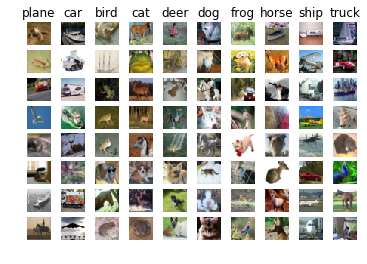

In [13]:
# An important way to gain intuition about how an algorithm works is to
# visualize the mistakes that it makes. In this visualization, we show examples
# of images that are misclassified by our current system. The first column
# shows images that our system labeled as "plane" but whose true label is
# something other than "plane".

examples_per_class = 8
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for cls, cls_name in enumerate(classes):
    idxs = np.where((y_test != cls) & (y_test_pred == cls))[0]
    idxs = np.random.choice(idxs, examples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, len(classes), i * len(classes) + cls + 1)
        plt.imshow(X_test[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls_name)
plt.show()

### Inline question 1:
Describe the misclassification results that you see. Do they make sense?

## Neural Network on image features
Earlier in this assigment we saw that training a two-layer neural network on raw pixels achieved better classification performance than linear classifiers on raw pixels. In this notebook we have seen that linear classifiers on image features outperform linear classifiers on raw pixels. 

For completeness, we should also try training a neural network on image features. This approach should outperform all previous approaches: you should easily be able to achieve over 55% classification accuracy on the test set; our best model achieves about 60% classification accuracy.

In [14]:
print(X_train_feats.shape)

(49000, 155)


In [15]:
from cs231n.classifiers.neural_net import TwoLayerNet

input_dim = X_train_feats.shape[1]
hidden_dim = 500
num_classes = 10

net = TwoLayerNet(input_dim, hidden_dim, num_classes)
best_net = None
best_val = 0

################################################################################
# TODO: Train a two-layer neural network on image features. You may want to    #
# cross-validate various parameters as in previous sections. Store your best   #
# model in the best_net variable.                                              #
################################################################################

num_params=50

learning_rates = np.log10([5e-2, 1e0])
regularization_strengths = np.log10([0.001, 1])
hidden_size = np.log10([10, 50])

range_lr  = np.logspace(learning_rates[0],learning_rates[1],num_params)
range_reg = np.logspace(regularization_strengths[0],regularization_strengths[1],num_params)
range_hid = np.logspace(hidden_size[0], hidden_size[1], num_params).astype('int32')

range_lr = range_lr[np.random.permutation(num_params)]
range_reg = range_reg[np.random.permutation(num_params)]
range_hid = range_hid[np.random.permutation(num_params)]

for learning_rate, regularization_strength, nhidden in zip(range_lr, range_reg, range_hid):
    net = TwoLayerNet(input_dim, nhidden, num_classes)
    print("Starting iteration with rate %e, regstrength %e and hidden layer size %i"%(learning_rate,regularization_strength,nhidden))
    
    # Train the network
    stats = net.train(X_train_feats, y_train, X_val_feats, y_val,
                num_iters=10000, batch_size=200,
                learning_rate=learning_rate, learning_rate_decay=0.95,
                reg=regularization_strength, verbose=True, num_epoch=20)

    # Predict on the validation set
    train_acc = stats['train_acc_history'][-1]
    val_acc = (net.predict(X_val_feats) == y_val).mean()
    print('Validation accuracy: ', val_acc)
    print('\n')
    
    results[(learning_rate,regularization_strength)]=(train_acc,val_acc)
    if val_acc > best_val:
        print("prev best val: %e, next best val: %e"%(best_val, val_acc))
        best_val = val_acc
        best_net = net


################################################################################
#                              END OF YOUR CODE                                #
################################################################################

Starting iteration with rate 3.759879e-01, regstrength 1.325711e-03 and hidden layer size 14
iteration 0 / 10000: loss 2.302585
iteration 100 / 10000: loss 1.798546
iteration 200 / 10000: loss 1.439739
iteration 300 / 10000: loss 1.308191
iteration 400 / 10000: loss 1.470945
iteration 500 / 10000: loss 1.373103
iteration 600 / 10000: loss 1.452514
iteration 700 / 10000: loss 1.405214
iteration 800 / 10000: loss 1.535544
iteration 900 / 10000: loss 1.564349
iteration 1000 / 10000: loss 1.321581
iteration 1100 / 10000: loss 1.347691
iteration 1200 / 10000: loss 1.352269
iteration 1300 / 10000: loss 1.397684
iteration 1400 / 10000: loss 1.359335
iteration 1500 / 10000: loss 1.416243
iteration 1600 / 10000: loss 1.380701
iteration 1700 / 10000: loss 1.509528
iteration 1800 / 10000: loss 1.471577
iteration 1900 / 10000: loss 1.345650
iteration 2000 / 10000: loss 1.585643
iteration 2100 / 10000: loss 1.553012
iteration 2200 / 10000: loss 1.271631
iteration 2300 / 10000: loss 1.437356
iterati

iteration 800 / 10000: loss 1.601673
iteration 900 / 10000: loss 1.537863
iteration 1000 / 10000: loss 1.546000
iteration 1100 / 10000: loss 1.554494
iteration 1200 / 10000: loss 1.535748
iteration 1300 / 10000: loss 1.563875
iteration 1400 / 10000: loss 1.508488
iteration 1500 / 10000: loss 1.542553
iteration 1600 / 10000: loss 1.695247
iteration 1700 / 10000: loss 1.600893
iteration 1800 / 10000: loss 1.445977
iteration 1900 / 10000: loss 1.588069
iteration 2000 / 10000: loss 1.516197
iteration 2100 / 10000: loss 1.662731
iteration 2200 / 10000: loss 1.470607
iteration 2300 / 10000: loss 1.543173
iteration 2400 / 10000: loss 1.483731
iteration 2500 / 10000: loss 1.450765
iteration 2600 / 10000: loss 1.603380
iteration 2700 / 10000: loss 1.502098
iteration 2800 / 10000: loss 1.545946
iteration 2900 / 10000: loss 1.527564
iteration 3000 / 10000: loss 1.534474
iteration 3100 / 10000: loss 1.401210
iteration 3200 / 10000: loss 1.494369
iteration 3300 / 10000: loss 1.536333
iteration 3400

iteration 1900 / 10000: loss 1.806458
iteration 2000 / 10000: loss 1.712170
iteration 2100 / 10000: loss 1.637752
iteration 2200 / 10000: loss 1.635110
iteration 2300 / 10000: loss 1.795557
iteration 2400 / 10000: loss 1.697637
iteration 2500 / 10000: loss 1.678320
iteration 2600 / 10000: loss 1.757365
iteration 2700 / 10000: loss 1.734027
iteration 2800 / 10000: loss 1.774444
iteration 2900 / 10000: loss 1.728576
iteration 3000 / 10000: loss 1.744804
iteration 3100 / 10000: loss 1.774035
iteration 3200 / 10000: loss 1.723337
iteration 3300 / 10000: loss 1.727210
iteration 3400 / 10000: loss 1.760016
iteration 3500 / 10000: loss 1.693898
iteration 3600 / 10000: loss 1.689227
iteration 3700 / 10000: loss 1.598735
iteration 3800 / 10000: loss 1.673847
iteration 3900 / 10000: loss 1.796223
iteration 4000 / 10000: loss 1.770644
iteration 4100 / 10000: loss 1.757629
iteration 4200 / 10000: loss 1.727983
iteration 4300 / 10000: loss 1.726941
iteration 4400 / 10000: loss 1.782807
iteration 45

iteration 3200 / 10000: loss 1.912164
iteration 3300 / 10000: loss 1.945976
iteration 3400 / 10000: loss 1.935706
iteration 3500 / 10000: loss 1.960854
iteration 3600 / 10000: loss 1.873214
iteration 3700 / 10000: loss 1.925722
iteration 3800 / 10000: loss 1.847467
iteration 3900 / 10000: loss 1.948808
iteration 4000 / 10000: loss 1.928083
iteration 4100 / 10000: loss 1.922455
iteration 4200 / 10000: loss 1.918507
iteration 4300 / 10000: loss 1.901086
iteration 4400 / 10000: loss 1.920947
iteration 4500 / 10000: loss 1.934200
iteration 4600 / 10000: loss 1.948593
iteration 4700 / 10000: loss 1.870778
iteration 4800 / 10000: loss 2.000305
iteration 4900 / 10000: loss 1.894586
iteration 5000 / 10000: loss 1.944341
iteration 5100 / 10000: loss 1.955208
iteration 5200 / 10000: loss 1.906679
iteration 5300 / 10000: loss 1.924538
iteration 5400 / 10000: loss 1.876699
iteration 5500 / 10000: loss 1.993937
iteration 5600 / 10000: loss 1.860334
iteration 5700 / 10000: loss 1.889683
iteration 58

iteration 4300 / 10000: loss 1.662875
iteration 4400 / 10000: loss 1.554330
iteration 4500 / 10000: loss 1.627646
iteration 4600 / 10000: loss 1.804463
iteration 4700 / 10000: loss 1.748987
iteration 4800 / 10000: loss 1.832916
iteration 4900 / 10000: loss 1.658842
iteration 5000 / 10000: loss 1.699528
iteration 5100 / 10000: loss 1.627606
iteration 5200 / 10000: loss 1.670922
iteration 5300 / 10000: loss 1.609705
iteration 5400 / 10000: loss 1.602327
iteration 5500 / 10000: loss 1.685319
iteration 5600 / 10000: loss 1.705113
iteration 5700 / 10000: loss 1.748627
iteration 5800 / 10000: loss 1.692840
iteration 5900 / 10000: loss 1.562604
iteration 6000 / 10000: loss 1.499549
iteration 6100 / 10000: loss 1.618408
iteration 6200 / 10000: loss 1.732779
iteration 6300 / 10000: loss 1.597167
iteration 6400 / 10000: loss 1.576392
iteration 6500 / 10000: loss 1.682907
iteration 6600 / 10000: loss 1.741641
iteration 6700 / 10000: loss 1.584417
iteration 6800 / 10000: loss 1.697772
iteration 69

iteration 5500 / 10000: loss 1.999386
iteration 5600 / 10000: loss 2.054691
iteration 5700 / 10000: loss 2.056935
iteration 5800 / 10000: loss 2.036479
iteration 5900 / 10000: loss 2.035891
iteration 6000 / 10000: loss 2.097838
iteration 6100 / 10000: loss 2.069636
iteration 6200 / 10000: loss 2.049448
iteration 6300 / 10000: loss 2.066068
iteration 6400 / 10000: loss 2.083193
iteration 6500 / 10000: loss 2.065060
iteration 6600 / 10000: loss 2.044704
iteration 6700 / 10000: loss 2.055471
iteration 6800 / 10000: loss 2.119990
iteration 6900 / 10000: loss 2.062756
iteration 7000 / 10000: loss 1.965946
iteration 7100 / 10000: loss 2.103150
iteration 7200 / 10000: loss 2.106364
iteration 7300 / 10000: loss 2.076521
iteration 7400 / 10000: loss 1.987541
iteration 7500 / 10000: loss 2.013139
iteration 7600 / 10000: loss 2.095809
iteration 7700 / 10000: loss 2.075985
iteration 7800 / 10000: loss 2.056999
iteration 7900 / 10000: loss 1.987151
iteration 8000 / 10000: loss 2.055094
iteration 81

iteration 6900 / 10000: loss 2.275642
iteration 7000 / 10000: loss 2.262900
iteration 7100 / 10000: loss 2.269500
iteration 7200 / 10000: loss 2.243643
iteration 7300 / 10000: loss 2.256243
iteration 7400 / 10000: loss 2.254993
iteration 7500 / 10000: loss 2.263414
iteration 7600 / 10000: loss 2.252812
iteration 7700 / 10000: loss 2.275145
iteration 7800 / 10000: loss 2.263201
iteration 7900 / 10000: loss 2.272461
iteration 8000 / 10000: loss 2.226455
iteration 8100 / 10000: loss 2.250130
iteration 8200 / 10000: loss 2.271657
iteration 8300 / 10000: loss 2.244089
iteration 8400 / 10000: loss 2.221595
iteration 8500 / 10000: loss 2.234816
iteration 8600 / 10000: loss 2.253165
iteration 8700 / 10000: loss 2.285706
iteration 8800 / 10000: loss 2.249561
iteration 8900 / 10000: loss 2.245254
iteration 9000 / 10000: loss 2.282892
iteration 9100 / 10000: loss 2.229094
iteration 9200 / 10000: loss 2.233124
iteration 9300 / 10000: loss 2.272438
iteration 9400 / 10000: loss 2.283150
iteration 95

iteration 7900 / 10000: loss 2.302794
iteration 8000 / 10000: loss 2.302709
iteration 8100 / 10000: loss 2.302487
iteration 8200 / 10000: loss 2.303142
iteration 8300 / 10000: loss 2.302756
iteration 8400 / 10000: loss 2.302838
iteration 8500 / 10000: loss 2.302561
iteration 8600 / 10000: loss 2.302619
iteration 8700 / 10000: loss 2.302563
iteration 8800 / 10000: loss 2.302539
iteration 8900 / 10000: loss 2.302948
iteration 9000 / 10000: loss 2.302574
iteration 9100 / 10000: loss 2.302725
iteration 9200 / 10000: loss 2.302571
iteration 9300 / 10000: loss 2.302562
iteration 9400 / 10000: loss 2.302702
iteration 9500 / 10000: loss 2.302808
iteration 9600 / 10000: loss 2.302617
iteration 9700 / 10000: loss 2.303052
iteration 9800 / 10000: loss 2.302509
iteration 9900 / 10000: loss 2.302855
Validation accuracy:  0.078


Starting iteration with rate 1.698254e-01, regstrength 4.291934e-01 and hidden layer size 27
iteration 0 / 10000: loss 2.302604
iteration 100 / 10000: loss 2.302680
iterati

iteration 9200 / 10000: loss 2.234723
iteration 9300 / 10000: loss 2.266675
iteration 9400 / 10000: loss 2.287501
iteration 9500 / 10000: loss 2.279804
iteration 9600 / 10000: loss 2.277702
iteration 9700 / 10000: loss 2.265068
iteration 9800 / 10000: loss 2.287528
iteration 9900 / 10000: loss 2.260986
Validation accuracy:  0.246


Starting iteration with rate 4.248906e-01, regstrength 7.543120e-01 and hidden layer size 14
iteration 0 / 10000: loss 2.302602
iteration 100 / 10000: loss 2.303464
iteration 200 / 10000: loss 2.302951
iteration 300 / 10000: loss 2.301923
iteration 400 / 10000: loss 2.303877
iteration 500 / 10000: loss 2.303219
iteration 600 / 10000: loss 2.302953
iteration 700 / 10000: loss 2.303298
iteration 800 / 10000: loss 2.302540
iteration 900 / 10000: loss 2.303283
iteration 1000 / 10000: loss 2.303141
iteration 1100 / 10000: loss 2.301819
iteration 1200 / 10000: loss 2.303881
iteration 1300 / 10000: loss 2.303780
iteration 1400 / 10000: loss 2.302748
iteration 1500 

iteration 300 / 10000: loss 2.302755
iteration 400 / 10000: loss 2.303489
iteration 500 / 10000: loss 2.303445
iteration 600 / 10000: loss 2.302902
iteration 700 / 10000: loss 2.301902
iteration 800 / 10000: loss 2.303059
iteration 900 / 10000: loss 2.302652
iteration 1000 / 10000: loss 2.302576
iteration 1100 / 10000: loss 2.302276
iteration 1200 / 10000: loss 2.303108
iteration 1300 / 10000: loss 2.302664
iteration 1400 / 10000: loss 2.304152
iteration 1500 / 10000: loss 2.303301
iteration 1600 / 10000: loss 2.301904
iteration 1700 / 10000: loss 2.302692
iteration 1800 / 10000: loss 2.303559
iteration 1900 / 10000: loss 2.302628
iteration 2000 / 10000: loss 2.302154
iteration 2100 / 10000: loss 2.303096
iteration 2200 / 10000: loss 2.303375
iteration 2300 / 10000: loss 2.303048
iteration 2400 / 10000: loss 2.302473
iteration 2500 / 10000: loss 2.301267
iteration 2600 / 10000: loss 2.302836
iteration 2700 / 10000: loss 2.303354
iteration 2800 / 10000: loss 2.303053
iteration 2900 / 10

iteration 1400 / 10000: loss 1.667297
iteration 1500 / 10000: loss 1.709878
iteration 1600 / 10000: loss 1.559384
iteration 1700 / 10000: loss 1.635898
iteration 1800 / 10000: loss 1.754268
iteration 1900 / 10000: loss 1.486444
iteration 2000 / 10000: loss 1.513016
iteration 2100 / 10000: loss 1.628677
iteration 2200 / 10000: loss 1.720247
iteration 2300 / 10000: loss 1.687594
iteration 2400 / 10000: loss 1.667012
iteration 2500 / 10000: loss 1.591356
iteration 2600 / 10000: loss 1.538070
iteration 2700 / 10000: loss 1.601928
iteration 2800 / 10000: loss 1.658194
iteration 2900 / 10000: loss 1.475274
iteration 3000 / 10000: loss 1.642611
iteration 3100 / 10000: loss 1.589763
iteration 3200 / 10000: loss 1.691730
iteration 3300 / 10000: loss 1.626959
iteration 3400 / 10000: loss 1.518866
iteration 3500 / 10000: loss 1.585676
iteration 3600 / 10000: loss 1.587334
iteration 3700 / 10000: loss 1.656732
iteration 3800 / 10000: loss 1.693548
iteration 3900 / 10000: loss 1.728381
iteration 40

iteration 2700 / 10000: loss 1.407606
iteration 2800 / 10000: loss 1.570463
iteration 2900 / 10000: loss 1.435671
iteration 3000 / 10000: loss 1.312213
iteration 3100 / 10000: loss 1.470047
iteration 3200 / 10000: loss 1.444248
iteration 3300 / 10000: loss 1.512257
iteration 3400 / 10000: loss 1.319917
iteration 3500 / 10000: loss 1.527247
iteration 3600 / 10000: loss 1.512363
iteration 3700 / 10000: loss 1.484125
iteration 3800 / 10000: loss 1.478022
iteration 3900 / 10000: loss 1.439000
iteration 4000 / 10000: loss 1.447258
iteration 4100 / 10000: loss 1.409302
iteration 4200 / 10000: loss 1.338082
iteration 4300 / 10000: loss 1.558621
iteration 4400 / 10000: loss 1.384228
iteration 4500 / 10000: loss 1.466829
iteration 4600 / 10000: loss 1.563885
iteration 4700 / 10000: loss 1.377424
iteration 4800 / 10000: loss 1.446931
iteration 4900 / 10000: loss 1.305346
iteration 5000 / 10000: loss 1.430273
iteration 5100 / 10000: loss 1.403147
iteration 5200 / 10000: loss 1.397489
iteration 53

iteration 3700 / 10000: loss 1.420108
iteration 3800 / 10000: loss 1.208221
iteration 3900 / 10000: loss 1.205861
iteration 4000 / 10000: loss 1.262558
iteration 4100 / 10000: loss 1.361935
iteration 4200 / 10000: loss 1.293236
iteration 4300 / 10000: loss 1.195955
iteration 4400 / 10000: loss 1.265698
iteration 4500 / 10000: loss 1.222636
iteration 4600 / 10000: loss 1.347304
iteration 4700 / 10000: loss 1.274673
iteration 4800 / 10000: loss 1.338785
iteration 4900 / 10000: loss 1.260759
iteration 5000 / 10000: loss 1.267301
iteration 5100 / 10000: loss 1.434883
iteration 5200 / 10000: loss 1.224795
iteration 5300 / 10000: loss 1.368246
iteration 5400 / 10000: loss 1.243142
iteration 5500 / 10000: loss 1.396041
iteration 5600 / 10000: loss 1.222209
iteration 5700 / 10000: loss 1.321766
iteration 5800 / 10000: loss 1.238372
iteration 5900 / 10000: loss 1.154574
iteration 6000 / 10000: loss 1.288770
iteration 6100 / 10000: loss 1.285680
iteration 6200 / 10000: loss 1.322902
iteration 63

iteration 5100 / 10000: loss 2.302931
iteration 5200 / 10000: loss 2.303543
iteration 5300 / 10000: loss 2.304093
iteration 5400 / 10000: loss 2.303183
iteration 5500 / 10000: loss 2.304175
iteration 5600 / 10000: loss 2.302774
iteration 5700 / 10000: loss 2.302668
iteration 5800 / 10000: loss 2.302257
iteration 5900 / 10000: loss 2.302330
iteration 6000 / 10000: loss 2.302739
iteration 6100 / 10000: loss 2.302846
iteration 6200 / 10000: loss 2.303630
iteration 6300 / 10000: loss 2.303649
iteration 6400 / 10000: loss 2.302473
iteration 6500 / 10000: loss 2.302418
iteration 6600 / 10000: loss 2.302976
iteration 6700 / 10000: loss 2.305166
iteration 6800 / 10000: loss 2.303062
iteration 6900 / 10000: loss 2.303507
iteration 7000 / 10000: loss 2.302131
iteration 7100 / 10000: loss 2.303508
iteration 7200 / 10000: loss 2.301559
iteration 7300 / 10000: loss 2.303020
iteration 7400 / 10000: loss 2.304438
iteration 7500 / 10000: loss 2.303241
iteration 7600 / 10000: loss 2.302587
iteration 77

iteration 6100 / 10000: loss 1.424526
iteration 6200 / 10000: loss 1.315896
iteration 6300 / 10000: loss 1.500410
iteration 6400 / 10000: loss 1.459916
iteration 6500 / 10000: loss 1.450712
iteration 6600 / 10000: loss 1.388978
iteration 6700 / 10000: loss 1.467159
iteration 6800 / 10000: loss 1.477071
iteration 6900 / 10000: loss 1.370885
iteration 7000 / 10000: loss 1.437062
iteration 7100 / 10000: loss 1.465850
iteration 7200 / 10000: loss 1.447033
iteration 7300 / 10000: loss 1.468152
iteration 7400 / 10000: loss 1.376891
iteration 7500 / 10000: loss 1.488475
iteration 7600 / 10000: loss 1.454415
iteration 7700 / 10000: loss 1.468680
iteration 7800 / 10000: loss 1.505212
iteration 7900 / 10000: loss 1.619820
iteration 8000 / 10000: loss 1.501995
iteration 8100 / 10000: loss 1.511108
iteration 8200 / 10000: loss 1.502269
iteration 8300 / 10000: loss 1.440324
iteration 8400 / 10000: loss 1.449861
iteration 8500 / 10000: loss 1.417692
iteration 8600 / 10000: loss 1.473459
iteration 87

iteration 7200 / 10000: loss 2.111165
iteration 7300 / 10000: loss 2.042822
iteration 7400 / 10000: loss 2.088653
iteration 7500 / 10000: loss 2.167026
iteration 7600 / 10000: loss 2.081321
iteration 7700 / 10000: loss 2.160885
iteration 7800 / 10000: loss 2.064628
iteration 7900 / 10000: loss 2.107052
iteration 8000 / 10000: loss 2.099915
iteration 8100 / 10000: loss 2.045243
iteration 8200 / 10000: loss 2.107991
iteration 8300 / 10000: loss 2.099091
iteration 8400 / 10000: loss 2.075445
iteration 8500 / 10000: loss 2.095346
iteration 8600 / 10000: loss 2.053267
iteration 8700 / 10000: loss 2.074744
iteration 8800 / 10000: loss 2.132036
iteration 8900 / 10000: loss 2.024275
iteration 9000 / 10000: loss 2.103189
iteration 9100 / 10000: loss 2.097199
iteration 9200 / 10000: loss 2.122937
iteration 9300 / 10000: loss 2.054799
iteration 9400 / 10000: loss 2.028215
iteration 9500 / 10000: loss 2.139684
iteration 9600 / 10000: loss 2.070047
iteration 9700 / 10000: loss 2.069353
iteration 98

iteration 8300 / 10000: loss 1.764881
iteration 8400 / 10000: loss 1.710535
iteration 8500 / 10000: loss 1.758889
iteration 8600 / 10000: loss 1.742544
iteration 8700 / 10000: loss 1.583349
iteration 8800 / 10000: loss 1.698970
iteration 8900 / 10000: loss 1.686594
iteration 9000 / 10000: loss 1.655781
iteration 9100 / 10000: loss 1.739992
iteration 9200 / 10000: loss 1.732181
iteration 9300 / 10000: loss 1.660652
iteration 9400 / 10000: loss 1.679238
iteration 9500 / 10000: loss 1.707372
iteration 9600 / 10000: loss 1.707106
iteration 9700 / 10000: loss 1.638606
iteration 9800 / 10000: loss 1.718009
iteration 9900 / 10000: loss 1.690683
Validation accuracy:  0.505


Starting iteration with rate 5.104251e-01, regstrength 1.151395e-03 and hidden layer size 22
iteration 0 / 10000: loss 2.302585
iteration 100 / 10000: loss 1.661267
iteration 200 / 10000: loss 1.550444
iteration 300 / 10000: loss 1.388713
iteration 400 / 10000: loss 1.359431
iteration 500 / 10000: loss 1.434241
iteration 6

iteration 9500 / 10000: loss 1.763235
iteration 9600 / 10000: loss 1.834600
iteration 9700 / 10000: loss 1.776848
iteration 9800 / 10000: loss 1.733148
iteration 9900 / 10000: loss 1.787514
Validation accuracy:  0.481


Starting iteration with rate 9.795756e-02, regstrength 2.329952e-03 and hidden layer size 39
iteration 0 / 10000: loss 2.302585
iteration 100 / 10000: loss 2.302289
iteration 200 / 10000: loss 2.275506
iteration 300 / 10000: loss 1.936253
iteration 400 / 10000: loss 1.845921
iteration 500 / 10000: loss 1.593510
iteration 600 / 10000: loss 1.495938
iteration 700 / 10000: loss 1.490173
iteration 800 / 10000: loss 1.446810
iteration 900 / 10000: loss 1.469488
iteration 1000 / 10000: loss 1.433285
iteration 1100 / 10000: loss 1.495090
iteration 1200 / 10000: loss 1.493555
iteration 1300 / 10000: loss 1.396490
iteration 1400 / 10000: loss 1.386925
iteration 1500 / 10000: loss 1.356871
iteration 1600 / 10000: loss 1.576909
iteration 1700 / 10000: loss 1.505768
iteration 1800 

iteration 300 / 10000: loss 1.808169
iteration 400 / 10000: loss 1.979468
iteration 500 / 10000: loss 1.864808
iteration 600 / 10000: loss 1.844334
iteration 700 / 10000: loss 1.835288
iteration 800 / 10000: loss 1.827542
iteration 900 / 10000: loss 1.951279
iteration 1000 / 10000: loss 1.861685
iteration 1100 / 10000: loss 1.835694
iteration 1200 / 10000: loss 1.791740
iteration 1300 / 10000: loss 1.855561
iteration 1400 / 10000: loss 1.856436
iteration 1500 / 10000: loss 1.877985
iteration 1600 / 10000: loss 1.847234
iteration 1700 / 10000: loss 1.775610
iteration 1800 / 10000: loss 1.753681
iteration 1900 / 10000: loss 1.843674
iteration 2000 / 10000: loss 1.787736
iteration 2100 / 10000: loss 1.955475
iteration 2200 / 10000: loss 1.812964
iteration 2300 / 10000: loss 1.811662
iteration 2400 / 10000: loss 1.825410
iteration 2500 / 10000: loss 1.814749
iteration 2600 / 10000: loss 1.889441
iteration 2700 / 10000: loss 1.837066
iteration 2800 / 10000: loss 1.871447
iteration 2900 / 10

iteration 1400 / 10000: loss 2.277948
iteration 1500 / 10000: loss 2.299423
iteration 1600 / 10000: loss 2.286211
iteration 1700 / 10000: loss 2.266375
iteration 1800 / 10000: loss 2.271405
iteration 1900 / 10000: loss 2.293244
iteration 2000 / 10000: loss 2.285206
iteration 2100 / 10000: loss 2.294688
iteration 2200 / 10000: loss 2.297235
iteration 2300 / 10000: loss 2.297223
iteration 2400 / 10000: loss 2.296894
iteration 2500 / 10000: loss 2.278483
iteration 2600 / 10000: loss 2.311107
iteration 2700 / 10000: loss 2.283915
iteration 2800 / 10000: loss 2.298911
iteration 2900 / 10000: loss 2.301065
iteration 3000 / 10000: loss 2.279020
iteration 3100 / 10000: loss 2.283301
iteration 3200 / 10000: loss 2.297140
iteration 3300 / 10000: loss 2.281192
iteration 3400 / 10000: loss 2.285699
iteration 3500 / 10000: loss 2.289405
iteration 3600 / 10000: loss 2.282517
iteration 3700 / 10000: loss 2.286056
iteration 3800 / 10000: loss 2.298857
iteration 3900 / 10000: loss 2.285877
iteration 40

iteration 2700 / 10000: loss 2.167112
iteration 2800 / 10000: loss 2.168536
iteration 2900 / 10000: loss 2.126284
iteration 3000 / 10000: loss 2.147012
iteration 3100 / 10000: loss 2.180487
iteration 3200 / 10000: loss 2.124941
iteration 3300 / 10000: loss 2.116924
iteration 3400 / 10000: loss 2.200227
iteration 3500 / 10000: loss 2.123995
iteration 3600 / 10000: loss 2.134775
iteration 3700 / 10000: loss 2.143416
iteration 3800 / 10000: loss 2.094386
iteration 3900 / 10000: loss 2.111883
iteration 4000 / 10000: loss 2.164228
iteration 4100 / 10000: loss 2.131567
iteration 4200 / 10000: loss 2.143508
iteration 4300 / 10000: loss 2.162927
iteration 4400 / 10000: loss 2.089026
iteration 4500 / 10000: loss 2.156284
iteration 4600 / 10000: loss 2.130044
iteration 4700 / 10000: loss 2.088511
iteration 4800 / 10000: loss 2.138844
iteration 4900 / 10000: loss 2.088553
iteration 5000 / 10000: loss 2.228031
iteration 5100 / 10000: loss 2.184834
iteration 5200 / 10000: loss 2.162524
iteration 53

iteration 3900 / 10000: loss 2.019555
iteration 4000 / 10000: loss 2.073035
iteration 4100 / 10000: loss 1.980300
iteration 4200 / 10000: loss 1.996427
iteration 4300 / 10000: loss 2.039069
iteration 4400 / 10000: loss 2.029131
iteration 4500 / 10000: loss 2.020031
iteration 4600 / 10000: loss 2.046646
iteration 4700 / 10000: loss 1.954485
iteration 4800 / 10000: loss 1.996005
iteration 4900 / 10000: loss 2.049847
iteration 5000 / 10000: loss 2.053161
iteration 5100 / 10000: loss 1.968366
iteration 5200 / 10000: loss 1.954269
iteration 5300 / 10000: loss 2.031413
iteration 5400 / 10000: loss 1.977640
iteration 5500 / 10000: loss 2.092070
iteration 5600 / 10000: loss 2.067812
iteration 5700 / 10000: loss 2.045894
iteration 5800 / 10000: loss 2.006849
iteration 5900 / 10000: loss 1.993435
iteration 6000 / 10000: loss 2.042986
iteration 6100 / 10000: loss 1.986215
iteration 6200 / 10000: loss 1.963191
iteration 6300 / 10000: loss 1.982720
iteration 6400 / 10000: loss 1.963481
iteration 65

iteration 5200 / 10000: loss 1.409056
iteration 5300 / 10000: loss 1.377305
iteration 5400 / 10000: loss 1.456592
iteration 5500 / 10000: loss 1.418190
iteration 5600 / 10000: loss 1.500392
iteration 5700 / 10000: loss 1.547269
iteration 5800 / 10000: loss 1.401784
iteration 5900 / 10000: loss 1.616673
iteration 6000 / 10000: loss 1.542195
iteration 6100 / 10000: loss 1.318120
iteration 6200 / 10000: loss 1.557149
iteration 6300 / 10000: loss 1.418550
iteration 6400 / 10000: loss 1.559462
iteration 6500 / 10000: loss 1.429915
iteration 6600 / 10000: loss 1.480463
iteration 6700 / 10000: loss 1.521079
iteration 6800 / 10000: loss 1.418369
iteration 6900 / 10000: loss 1.541038
iteration 7000 / 10000: loss 1.444900
iteration 7100 / 10000: loss 1.396795
iteration 7200 / 10000: loss 1.317361
iteration 7300 / 10000: loss 1.550650
iteration 7400 / 10000: loss 1.603707
iteration 7500 / 10000: loss 1.472452
iteration 7600 / 10000: loss 1.427621
iteration 7700 / 10000: loss 1.525243
iteration 78

iteration 6500 / 10000: loss 2.302040
iteration 6600 / 10000: loss 2.302126
iteration 6700 / 10000: loss 2.303502
iteration 6800 / 10000: loss 2.303855
iteration 6900 / 10000: loss 2.302974
iteration 7000 / 10000: loss 2.302282
iteration 7100 / 10000: loss 2.304099
iteration 7200 / 10000: loss 2.304072
iteration 7300 / 10000: loss 2.303150
iteration 7400 / 10000: loss 2.302366
iteration 7500 / 10000: loss 2.303002
iteration 7600 / 10000: loss 2.303157
iteration 7700 / 10000: loss 2.302601
iteration 7800 / 10000: loss 2.302107
iteration 7900 / 10000: loss 2.302781
iteration 8000 / 10000: loss 2.304017
iteration 8100 / 10000: loss 2.301678
iteration 8200 / 10000: loss 2.302527
iteration 8300 / 10000: loss 2.302459
iteration 8400 / 10000: loss 2.303277
iteration 8500 / 10000: loss 2.302137
iteration 8600 / 10000: loss 2.302753
iteration 8700 / 10000: loss 2.301985
iteration 8800 / 10000: loss 2.302649
iteration 8900 / 10000: loss 2.302600
iteration 9000 / 10000: loss 2.303211
iteration 91

In [16]:
# Run your neural net classifier on the test set. You should be able to
# get more than 55% accuracy.

test_acc = (best_net.predict(X_test_feats) == y_test).mean()
print(test_acc)

0.558


# Bonus: Design your own features!

You have seen that simple image features can improve classification performance. So far we have tried HOG and color histograms, but other types of features may be able to achieve even better classification performance.

For bonus points, design and implement a new type of feature and use it for image classification on CIFAR-10. Explain how your feature works and why you expect it to be useful for image classification. Implement it in this notebook, cross-validate any hyperparameters, and compare its performance to the HOG + Color histogram baseline.

# Bonus: Do something extra!
Use the material and code we have presented in this assignment to do something interesting. Was there another question we should have asked? Did any cool ideas pop into your head as you were working on the assignment? This is your chance to show off!